# Laboratorio 6

## Análisis de Redes Sociales

<ul>
   <li>Cristina Bautista 161260</li>
   <li>Andy Castillo 18040</li>
   <li>Marco Fuentes 18188</li>
   <li>Abril Palencia 18198</li>
</ul>

## Problema 4

### Descarga y  Carga

In [78]:
import numpy as np
import pandas as pd

In [114]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import FreqDist, ngrams
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcofuentes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcofuentes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [81]:
data = pd.read_csv('problema5_tweets.csv')

In [82]:
data.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs
0,1433971287811108869,@prensa_libre 👎👎🥚🥚🤮🤮💩💩🐀🐀🐀🐀pira corrupción #Ren...,Aura Perez,AuraPer75486154,2021-09-04T01:52:51.000Z,Sat Sep 04 01:52:51 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,2,1,NaN,NaN
1,1433971126389153794,@Factor4_GT @EmilianoCS @EFEnoticias @opsoms #...,Aura Perez,AuraPer75486154,2021-09-04T01:52:13.000Z,Sat Sep 04 01:52:13 +0000 2021,0,0,und,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,4,NaN,NaN
2,1433970899800240131,@AlianzaRgt 👎👎💩💩🥚🥚🤮🤮🤮🤮💩💩#Renuncia desconsuelo ...,Aura Perez,AuraPer75486154,2021-09-04T01:51:19.000Z,Sat Sep 04 01:51:19 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,2,1,NaN,NaN
3,1433965107751620610,@el_Periodico Que desgracia desgobierno maldit...,Aura Perez,AuraPer75486154,2021-09-04T01:28:18.000Z,Sat Sep 04 01:28:18 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,4,1,NaN,NaN
4,1433964253531226114,@prensa_libre #RenunciaGiamattei #RenunciaCons...,Aura Perez,AuraPer75486154,2021-09-04T01:24:54.000Z,Sat Sep 04 01:24:54 +0000 2021,0,0,und,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,1,NaN,NaN


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     3049 non-null   int64 
 1   Text         3049 non-null   object
 2   Name         3049 non-null   object
 3   Screen Name  3049 non-null   object
 4   UTC          3049 non-null   object
 5   Created At   3049 non-null   object
 6   Favorites    3049 non-null   int64 
 7   Retweets     3049 non-null   int64 
 8   Language     3049 non-null   object
 9   Client       3049 non-null   object
 10  Tweet Type   3049 non-null   object
 11  URLs         416 non-null    object
 12  Hashtags     3049 non-null   int64 
 13  Mentions     3049 non-null   int64 
 14  Media Type   1362 non-null   object
 15  Media URLs   1362 non-null   object
dtypes: int64(5), object(11)
memory usage: 381.2+ KB


### Preprocesamiento

In [84]:
data = data.rename(columns={"Tweet Id":"tweetId", "Text":"text", "Name":"name", "Screen Name":"screenName",
                           "UTC":"utc", "Created At":"createdAt", "Favorites":"favorites", "Retweets":"retweets",
                           "Language":"language", "Client":"client", "Tweet Type":"tweetType", "URLs":"urls",
                           "Hashtags":"hashtags", "Mentions":"mentions", "Media Type":"mediaType", 
                           "Media URLs":"mediaURLs"})

In [85]:
data.head()

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
0,1433971287811108869,@prensa_libre 👎👎🥚🥚🤮🤮💩💩🐀🐀🐀🐀pira corrupción #Ren...,Aura Perez,AuraPer75486154,2021-09-04T01:52:51.000Z,Sat Sep 04 01:52:51 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,2,1,NaN,NaN
1,1433971126389153794,@Factor4_GT @EmilianoCS @EFEnoticias @opsoms #...,Aura Perez,AuraPer75486154,2021-09-04T01:52:13.000Z,Sat Sep 04 01:52:13 +0000 2021,0,0,und,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,4,NaN,NaN
2,1433970899800240131,@AlianzaRgt 👎👎💩💩🥚🥚🤮🤮🤮🤮💩💩#Renuncia desconsuelo ...,Aura Perez,AuraPer75486154,2021-09-04T01:51:19.000Z,Sat Sep 04 01:51:19 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,2,1,NaN,NaN
3,1433965107751620610,@el_Periodico Que desgracia desgobierno maldit...,Aura Perez,AuraPer75486154,2021-09-04T01:28:18.000Z,Sat Sep 04 01:28:18 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,4,1,NaN,NaN
4,1433964253531226114,@prensa_libre #RenunciaGiamattei #RenunciaCons...,Aura Perez,AuraPer75486154,2021-09-04T01:24:54.000Z,Sat Sep 04 01:24:54 +0000 2021,0,0,und,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,1,NaN,NaN


In [86]:
# Eliminar url
data['text'] = data['text'].str.replace(r'http\S+', ' ')
data['client'] = data['client'].str.replace(r'http\S+', ' ')
data['urls'] = data['urls'].str.replace(r'http\S+', ' ')
data['mediaURLs'] = data['mediaURLs'].str.replace(r'http\S+', ' ')

<ipython-input-86-ab0d6b2d3a67>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace(r'http\S+', ' ')
<ipython-input-86-ab0d6b2d3a67>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['client'] = data['client'].str.replace(r'http\S+', ' ')
<ipython-input-86-ab0d6b2d3a67>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['urls'] = data['urls'].str.replace(r'http\S+', ' ')
<ipython-input-86-ab0d6b2d3a67>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['mediaURLs'] = data['mediaURLs'].str.replace(r'http\S+', ' ')


In [87]:
data.head()

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
0,1433971287811108869,@prensa_libre 👎👎🥚🥚🤮🤮💩💩🐀🐀🐀🐀pira corrupción #Ren...,Aura Perez,AuraPer75486154,2021-09-04T01:52:51.000Z,Sat Sep 04 01:52:51 +0000 2021,0,0,es,"<a href="" rel=""nofollow"">Twitter for Android</a>",Reply,NaN,2,1,NaN,NaN
1,1433971126389153794,@Factor4_GT @EmilianoCS @EFEnoticias @opsoms #...,Aura Perez,AuraPer75486154,2021-09-04T01:52:13.000Z,Sat Sep 04 01:52:13 +0000 2021,0,0,und,"<a href="" rel=""nofollow"">Twitter for Android</a>",Reply,NaN,3,4,NaN,NaN
2,1433970899800240131,@AlianzaRgt 👎👎💩💩🥚🥚🤮🤮🤮🤮💩💩#Renuncia desconsuelo ...,Aura Perez,AuraPer75486154,2021-09-04T01:51:19.000Z,Sat Sep 04 01:51:19 +0000 2021,0,0,es,"<a href="" rel=""nofollow"">Twitter for Android</a>",Reply,NaN,2,1,NaN,NaN
3,1433965107751620610,@el_Periodico Que desgracia desgobierno maldit...,Aura Perez,AuraPer75486154,2021-09-04T01:28:18.000Z,Sat Sep 04 01:28:18 +0000 2021,0,0,es,"<a href="" rel=""nofollow"">Twitter for Android</a>",Reply,NaN,4,1,NaN,NaN
4,1433964253531226114,@prensa_libre #RenunciaGiamattei #RenunciaCons...,Aura Perez,AuraPer75486154,2021-09-04T01:24:54.000Z,Sat Sep 04 01:24:54 +0000 2021,0,0,und,"<a href="" rel=""nofollow"">Twitter for Android</a>",Reply,NaN,3,1,NaN,NaN


In [88]:
# Se elimino todo lo que no sean letras, como emojis, signos de puntuacion y numeros
# data['text'] = data['text'].str.replace(r'[^A-Za-z\s]+', ' ')
data['client'] = data['client'].str.replace(r'[^A-Za-z]+', ' ')
data['tweetType'] = data['tweetType'].str.replace(r'[^A-Za-z]+', ' ')
data['mediaType'] = data['mediaType'].str.replace(r'[^A-Za-z\s]+', ' ')

<ipython-input-88-dc609b3ab3cf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['client'] = data['client'].str.replace(r'[^A-Za-z]+', ' ')
<ipython-input-88-dc609b3ab3cf>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweetType'] = data['tweetType'].str.replace(r'[^A-Za-z]+', ' ')
<ipython-input-88-dc609b3ab3cf>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['mediaType'] = data['mediaType'].str.replace(r'[^A-Za-z\s]+', ' ')


In [89]:
data.head()

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
0,1433971287811108869,@prensa_libre 👎👎🥚🥚🤮🤮💩💩🐀🐀🐀🐀pira corrupción #Ren...,Aura Perez,AuraPer75486154,2021-09-04T01:52:51.000Z,Sat Sep 04 01:52:51 +0000 2021,0,0,es,a href rel nofollow Twitter for Android a,Reply,NaN,2,1,NaN,NaN
1,1433971126389153794,@Factor4_GT @EmilianoCS @EFEnoticias @opsoms #...,Aura Perez,AuraPer75486154,2021-09-04T01:52:13.000Z,Sat Sep 04 01:52:13 +0000 2021,0,0,und,a href rel nofollow Twitter for Android a,Reply,NaN,3,4,NaN,NaN
2,1433970899800240131,@AlianzaRgt 👎👎💩💩🥚🥚🤮🤮🤮🤮💩💩#Renuncia desconsuelo ...,Aura Perez,AuraPer75486154,2021-09-04T01:51:19.000Z,Sat Sep 04 01:51:19 +0000 2021,0,0,es,a href rel nofollow Twitter for Android a,Reply,NaN,2,1,NaN,NaN
3,1433965107751620610,@el_Periodico Que desgracia desgobierno maldit...,Aura Perez,AuraPer75486154,2021-09-04T01:28:18.000Z,Sat Sep 04 01:28:18 +0000 2021,0,0,es,a href rel nofollow Twitter for Android a,Reply,NaN,4,1,NaN,NaN
4,1433964253531226114,@prensa_libre #RenunciaGiamattei #RenunciaCons...,Aura Perez,AuraPer75486154,2021-09-04T01:24:54.000Z,Sat Sep 04 01:24:54 +0000 2021,0,0,und,a href rel nofollow Twitter for Android a,Reply,NaN,3,1,NaN,NaN


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3049 non-null   int64 
 1   text        3049 non-null   object
 2   name        3049 non-null   object
 3   screenName  3049 non-null   object
 4   utc         3049 non-null   object
 5   createdAt   3049 non-null   object
 6   favorites   3049 non-null   int64 
 7   retweets    3049 non-null   int64 
 8   language    3049 non-null   object
 9   client      3049 non-null   object
 10  tweetType   3049 non-null   object
 11  urls        416 non-null    object
 12  hashtags    3049 non-null   int64 
 13  mentions    3049 non-null   int64 
 14  mediaType   1362 non-null   object
 15  mediaURLs   1362 non-null   object
dtypes: int64(5), object(11)
memory usage: 381.2+ KB


In [91]:
# Tokenize
tokenizer = RegexpTokenizer(r'\w+')

data['text'] = data['text'].apply(lambda x: tokenizer.tokenize(x))
data['name'] = data['name'].apply(lambda x: tokenizer.tokenize(x))
data['language'] = data['language'].apply(lambda x: tokenizer.tokenize(x))
data['client'] = data['client'].apply(lambda x: tokenizer.tokenize(x))
data['tweetType'] = data['tweetType'].apply(lambda x: tokenizer.tokenize(x))
data['mediaType'] = data['mediaType'].apply(lambda x: tokenizer.tokenize(str(x)))

In [93]:
# Stopwords
stopwords = stopwords.words('spanish')

In [94]:
data['text'] = data['text'].apply(lambda y: [w for w in y if w not in stopwords])

In [95]:
data.head()

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
0,1433971287811108869,"[prensa_libre, pira, corrupción, RenunciaGiama...","[Aura, Perez]",AuraPer75486154,2021-09-04T01:52:51.000Z,Sat Sep 04 01:52:51 +0000 2021,0,0,[es],"[a, href, rel, nofollow, Twitter, for, Android...",[Reply],NaN,2,1,[nan],NaN
1,1433971126389153794,"[Factor4_GT, EmilianoCS, EFEnoticias, opsoms, ...","[Aura, Perez]",AuraPer75486154,2021-09-04T01:52:13.000Z,Sat Sep 04 01:52:13 +0000 2021,0,0,[und],"[a, href, rel, nofollow, Twitter, for, Android...",[Reply],NaN,3,4,[nan],NaN
2,1433970899800240131,"[AlianzaRgt, Renuncia, desconsuelo, RenunciaGi...","[Aura, Perez]",AuraPer75486154,2021-09-04T01:51:19.000Z,Sat Sep 04 01:51:19 +0000 2021,0,0,[es],"[a, href, rel, nofollow, Twitter, for, Android...",[Reply],NaN,2,1,[nan],NaN
3,1433965107751620610,"[el_Periodico, Que, desgracia, desgobierno, ma...","[Aura, Perez]",AuraPer75486154,2021-09-04T01:28:18.000Z,Sat Sep 04 01:28:18 +0000 2021,0,0,[es],"[a, href, rel, nofollow, Twitter, for, Android...",[Reply],NaN,4,1,[nan],NaN
4,1433964253531226114,"[prensa_libre, RenunciaGiamattei, RenunciaCons...","[Aura, Perez]",AuraPer75486154,2021-09-04T01:24:54.000Z,Sat Sep 04 01:24:54 +0000 2021,0,0,[und],"[a, href, rel, nofollow, Twitter, for, Android...",[Reply],NaN,3,1,[nan],NaN


### Análisis exploratorio

In [96]:
words = []
for (index, review) in data.iterrows():
    words.extend(review['text'])

In [97]:
print(words[:5])
from collections import Counter
words_count = dict((x,words.count(x)) for x in set(words))

['prensa_libre', 'pira', 'corrupción', 'RenunciaGiamattei', 'RenunciaConsuelo']


[('RT', 2072), ('LordPajas', 1269), ('EstadoDeCalamidad', 752), ('El', 601), ('DrGiammattei', 557), ('RenunciaGiamattei', 524), ('Calamidad', 397), ('Estado', 396), ('RenunciaGiammattei', 356), ('NO', 330), ('La', 279), ('renunciagiamattei', 247), ('solo', 244), ('00', 243), ('cadena', 224)]


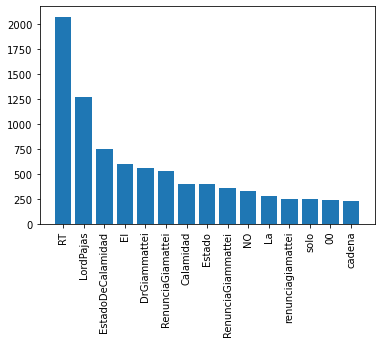

In [107]:
# Obtenemos las palabras mas populares

sort_orders = sorted(words_count.items(), key=lambda x: x[1], reverse=True)

first_15 = sort_orders[:15]

plt.bar([x[0] for x in first_15], [x[1] for x in first_15])
plt.xticks(rotation=90)
plt.show()

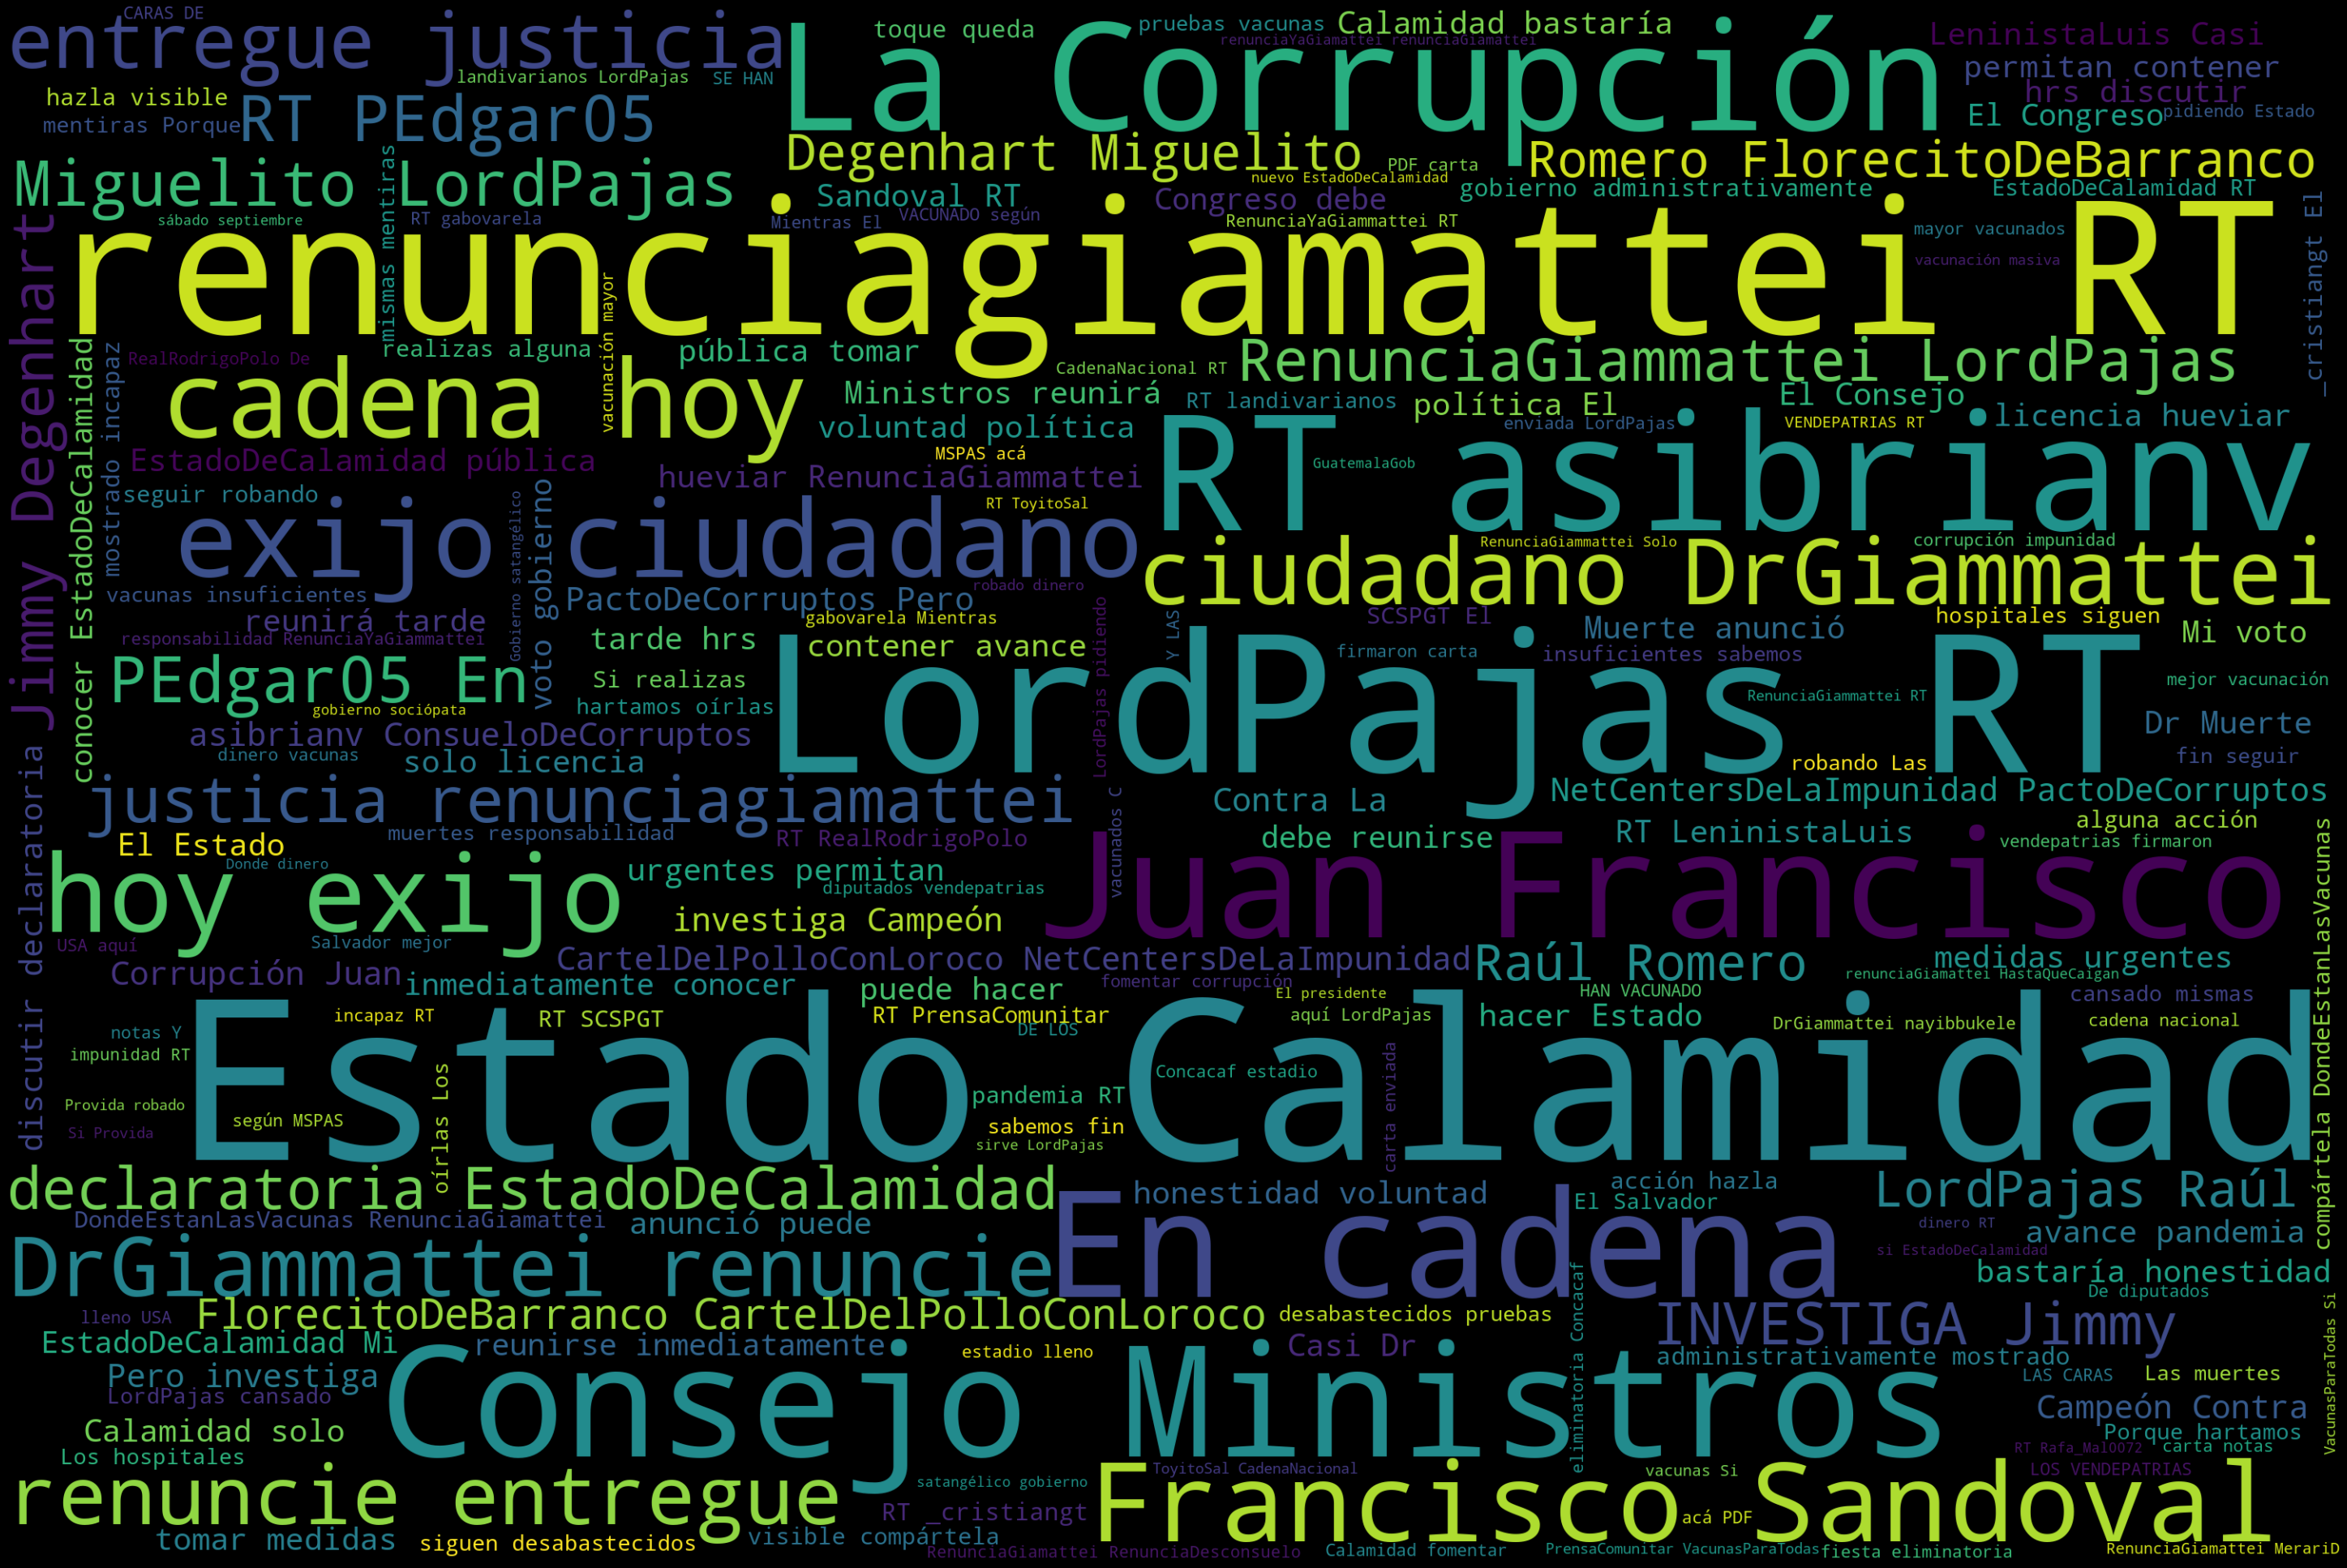

In [113]:
# Wordcloud 
all_text = data['text']
text_data = [" ".join(text) for text in all_text]
final_text = " ".join(text_data)

wordcloud_text = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(final_text)


fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [143]:
# ngramas

sentences = []

for (index , sentence) in data.iterrows():
    sentences.extend(sentence['text'])

In [176]:
n = 4
four_grams = ngrams(sentences, n)
five_grams = ngrams(sentences, 5)
six_grams = ngrams(sentences, 6)
seven_grams = ngrams(sentences, 7)

In [177]:
four_grams_freq = Counter(four_grams)

five_grams_freq = Counter(five_grams)
six_grams_freq = Counter(six_grams)
seven_grams_freq = Counter(seven_grams)

In [149]:
four_grams_freq.most_common(15)

[(('En', 'cadena', 'hoy', 'exijo'), 156),
 (('cadena', 'hoy', 'exijo', 'ciudadano'), 156),
 (('hoy', 'exijo', 'ciudadano', 'DrGiammattei'), 156),
 (('exijo', 'ciudadano', 'DrGiammattei', 'renuncie'), 156),
 (('ciudadano', 'DrGiammattei', 'renuncie', 'entregue'), 156),
 (('DrGiammattei', 'renuncie', 'entregue', 'justicia'), 156),
 (('renuncie', 'entregue', 'justicia', 'renunciagiamattei'), 156),
 (('RT', 'PEdgar05', 'En', 'cadena'), 155),
 (('PEdgar05', 'En', 'cadena', 'hoy'), 155),
 (('ConsueloDeCorruptos', 'NO', 'INVESTIGA', 'Jimmy'), 148),
 (('NO', 'INVESTIGA', 'Jimmy', 'Degenhart'), 148),
 (('INVESTIGA', 'Jimmy', 'Degenhart', 'Miguelito'), 148),
 (('Jimmy', 'Degenhart', 'Miguelito', 'LordPajas'), 148),
 (('Degenhart', 'Miguelito', 'LordPajas', 'Raúl'), 148),
 (('Miguelito', 'LordPajas', 'Raúl', 'Romero'), 148)]

In [178]:
five_grams_freq.most_common(5)

[(('En', 'cadena', 'hoy', 'exijo', 'ciudadano'), 156),
 (('cadena', 'hoy', 'exijo', 'ciudadano', 'DrGiammattei'), 156),
 (('hoy', 'exijo', 'ciudadano', 'DrGiammattei', 'renuncie'), 156),
 (('exijo', 'ciudadano', 'DrGiammattei', 'renuncie', 'entregue'), 156),
 (('ciudadano', 'DrGiammattei', 'renuncie', 'entregue', 'justicia'), 156)]

In [179]:
six_grams_freq.most_common(5)

[(('En', 'cadena', 'hoy', 'exijo', 'ciudadano', 'DrGiammattei'), 156),
 (('cadena', 'hoy', 'exijo', 'ciudadano', 'DrGiammattei', 'renuncie'), 156),
 (('hoy', 'exijo', 'ciudadano', 'DrGiammattei', 'renuncie', 'entregue'), 156),
 (('exijo', 'ciudadano', 'DrGiammattei', 'renuncie', 'entregue', 'justicia'),
  156),
 (('ciudadano',
   'DrGiammattei',
   'renuncie',
   'entregue',
   'justicia',
   'renunciagiamattei'),
  156)]

In [180]:
seven_grams_freq.most_common(5)

[(('En', 'cadena', 'hoy', 'exijo', 'ciudadano', 'DrGiammattei', 'renuncie'),
  156),
 (('cadena',
   'hoy',
   'exijo',
   'ciudadano',
   'DrGiammattei',
   'renuncie',
   'entregue'),
  156),
 (('hoy',
   'exijo',
   'ciudadano',
   'DrGiammattei',
   'renuncie',
   'entregue',
   'justicia'),
  156),
 (('exijo',
   'ciudadano',
   'DrGiammattei',
   'renuncie',
   'entregue',
   'justicia',
   'renunciagiamattei'),
  156),
 (('RT', 'PEdgar05', 'En', 'cadena', 'hoy', 'exijo', 'ciudadano'), 155)]

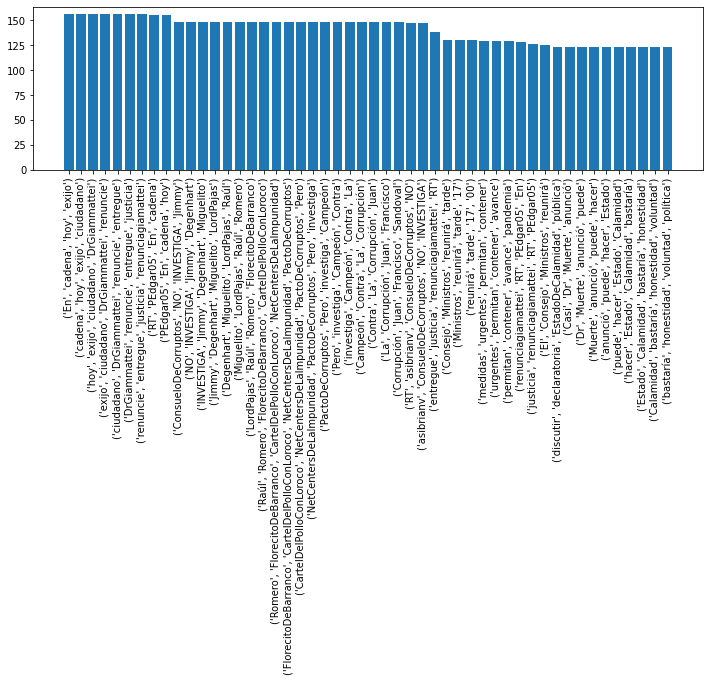

In [166]:

first_15 = four_grams_freq.most_common(50)

plt.bar([str(x[0]) for x in first_15], [x[1] for x in first_15])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,3)
plt.show()

In [214]:
users = data.filter(['name','screenName', 'retweets', 'favorites'])

In [215]:
# Los ordenamos por mayor numero de retweets
users.sort_values(by='retweets', ascending=False).head()
# P, Edgar parece tener la mayor cantidad de retweets

,name,screenName,retweets,favorites
247,"[P, Edgar]",PEdgar05,177,827
2833,"[Alberto, Sibrián]",asibrianv,160,326
2540,"[Profeta, Luis, Enrique, Pérez]",LeninistaLuis,143,439
1199,"[Cristian, Alvarez]",_cristiangt,126,820
1518,"[Secretaría, de, Comunicación, Social]",SCSPGT,101,181


In [216]:
data[data['screenName']=='PEdgar05']['text']

247    [En, cadena, hoy, exijo, ciudadano, DrGiammatt...
Name: text, dtype: object

In [217]:
data[data['screenName']=='SCSPGT']

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
1518,1433541777345048595,"[El, Consejo, Ministros, reunirá, tarde, 17, 0...","[Secretaría, de, Comunicación, Social]",SCSPGT,2021-09-02T21:26:08.000Z,Thu Sep 02 21:26:08 +0000 2021,181,101,[es],"[a, href, rel, nofollow, Twitter, Web, App, a]",[Tweet],NaN,1,0,[photo],


In [218]:
data[data['screenName']=='_cristiangt']

,tweetId,text,name,screenName,utc,createdAt,favorites,retweets,language,client,tweetType,urls,hashtags,mentions,mediaType,mediaURLs
1199,1433638407092178947,"[El, Congreso, debe, reunirse, inmediatamente,...","[Cristian, Alvarez]",_cristiangt,2021-09-03T03:50:06.000Z,Fri Sep 03 03:50:06 +0000 2021,820,126,[es],"[a, href, rel, nofollow, Twitter, for, Android...",[Tweet],NaN,1,0,[nan],NaN


In [219]:
# ahora por mayor numero de favoritos
users.sort_values(by='favorites', ascending=False).head()

,name,screenName,retweets,favorites
247,"[P, Edgar]",PEdgar05,177,827
1199,"[Cristian, Alvarez]",_cristiangt,126,820
2540,"[Profeta, Luis, Enrique, Pérez]",LeninistaLuis,143,439
2833,"[Alberto, Sibrián]",asibrianv,160,326
2603,[Landivarianos],landivarianos,88,221


### Conclusiones

Como se puede observar en la nube de palabras, de lo que más se ha habaldo últimamente en relación al gobierno es sobre el estado de calamidad y cómo el presidente está manejando el tema del COVID en estos momentos.
Otro de los temas que sobresalen son las quejas hacia el presidente sobre la corrupción y la exigencia de las personas para que renuncie de su cargo.
Luego si se analizan los distintos n-gramas, se puede ver que también la mayoría de palabras seguidas que se escriben son exigencias de que renuncie el presidente y que se haga justicia.
En general se puede ver que la